In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Data is downloaded from UCI data repository.For Data Discription you can read the complete documentation
[here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names) .
<br> Data contains 10 variables excluding the sample_code_number. Classes variable is response variable having two types of cancer.

In [2]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',\
            names=['sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion',\
                  'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','classes'])
data.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,classes
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


We can have the idea by reviewing and from documentation the data set tha all the variables are on likert scale from 1 to 10 and the response variable which is classes is distributed as 2 for benign, 4 for malignant which are the two types of cancers.
<br> Droping the Sample code number variable as this is of no use here it could be a database field.

In [3]:
data.drop('sample_code_number',axis=1,inplace=True)

By reviewing the dataframe info we can see that all the variables are INT except the bare_nuclei it should also be INT we shell review this problem later.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness                699 non-null int64
uniformity_of_cell_size        699 non-null int64
uniformity_of_cell_shape       699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
classes                        699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


Let see if there is any missing value in the data in all the columns.

In [5]:
data.notnull().all().all()

True

As there is no missing value in the data so we will see if there is any unexpected observation in any of the column one by one.we are using value_counts method as all the variables are on likertscale.So it is best to use value counts method.

In [6]:
data['clump_thickness'].value_counts(dropna= False)

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: clump_thickness, dtype: int64

In [7]:
data['uniformity_of_cell_size'].value_counts(dropna= False)

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: uniformity_of_cell_size, dtype: int64

In [8]:
data['uniformity_of_cell_shape'].value_counts(dropna= False)

1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: uniformity_of_cell_shape, dtype: int64

In [9]:
data['marginal_adhesion'].value_counts(dropna= False)

1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: marginal_adhesion, dtype: int64

In [10]:
data['single_epithelial_cell_size'].value_counts(dropna= False)

2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: single_epithelial_cell_size, dtype: int64

We can see that there are some '?' in bare_nuclei which are the missing values and due to there values the type of this variable was different.

In [11]:
data['bare_nuclei'].value_counts(dropna= False)

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [12]:
data.ix[data['bare_nuclei']=='?','bare_nuclei']=np.nan
data['bare_nuclei']=pd.to_numeric(data['bare_nuclei'],errors='coerce')
data.ix[data['bare_nuclei'].isnull(),'bare_nuclei']=round(np.mean(data['bare_nuclei']),0)
data['bare_nuclei']=data['bare_nuclei'].astype(int)
data.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,classes
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [13]:
data['bland_chromatin'].value_counts(dropna= False)

2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: bland_chromatin, dtype: int64

In [14]:
data['normal_nucleoli'].value_counts(dropna= False)

1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: normal_nucleoli, dtype: int64

In [15]:
data['mitoses'].value_counts(dropna= False)

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: mitoses, dtype: int64

Now after removing the unexpected observations and replacing them we can see that bare nuclei is also have int data type.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness                699 non-null int64
uniformity_of_cell_size        699 non-null int64
uniformity_of_cell_shape       699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null int32
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
classes                        699 non-null int64
dtypes: int32(1), int64(9)
memory usage: 51.9 KB


As we had completed data cleaning now we will plot the data to see how the data is distributed for both cases of cancer seperatly and we can see that for meligment data is more highly distributed which gives us an intuition that for higher values of the variables the meligment is the case.

In [17]:
def ploting(col):
    if col != 'classes' and  col != 'bare_nuclei':
        plt.subplot(2,1,1)
        sns.swarmplot(x='classes',y=col,data=data)
        plt.subplot(2,1,2)
        sns.boxplot(x='classes',y=col,data=data)
        plt.show()
    else:
        None

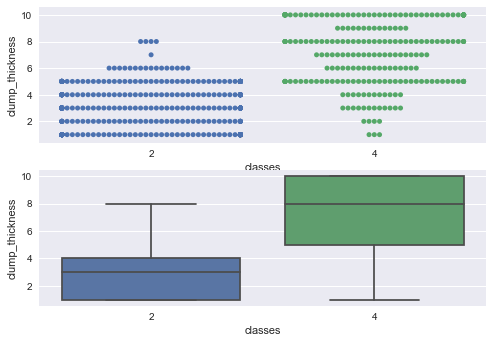

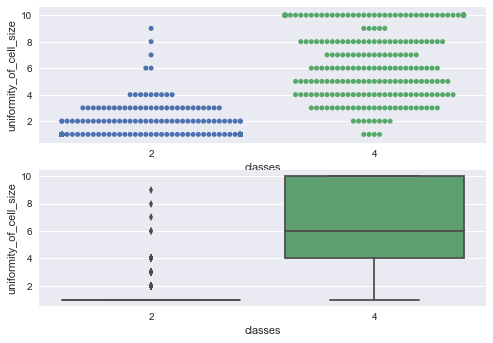

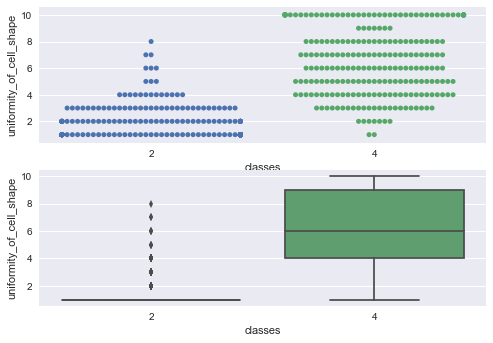

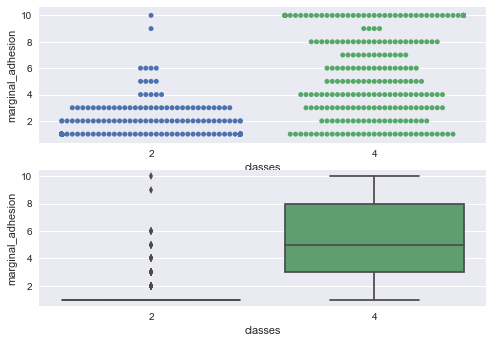

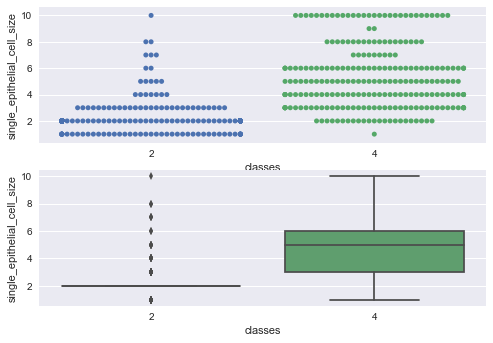

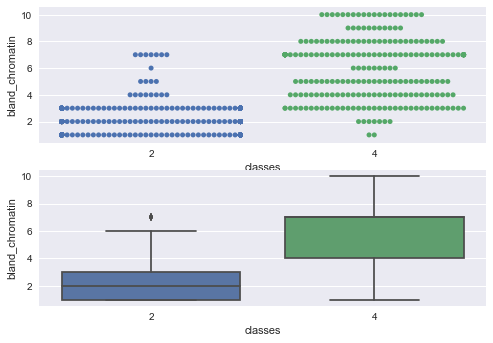

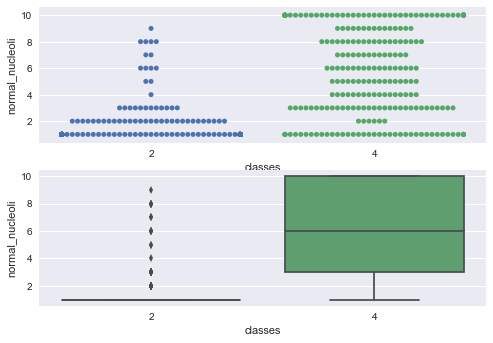

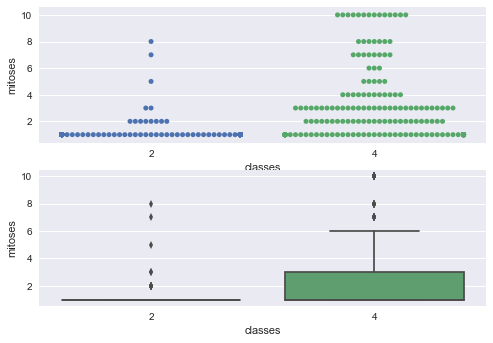

In [18]:
for col in data.columns:
    ploting(col)

Now i am going to change the values of calsses variable from 2 for benign, 4 for malignant to 0 for benign and 1 for malignant.I do this because i want to convert it into binery format.

In [19]:
data['classes']=data['classes'].apply(lambda x: 0 if x==2 else 1)

Imported all necessary modules for machine learning.As we are comparing Logistic regression with KNN so we are importing both of them from sciket learn library.

In [20]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report

Now spliting the data set into test and train with 30% of the data for test and 70% of the data for training the model.

In [21]:
y=data['classes'].values
X=data.drop('classes',axis=1).values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

Applied GridSearchCV function to get the best parameter value for the logistic regression and similarly will be applied to get the best parameter value for KNN.

In [22]:
space=np.logspace(-3,4,50)
logParam={'C':space}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,logParam,cv=5)
logreg_cv.fit(X_train,y_train)
print logreg_cv.best_params_

{'C': 1.3894954943731375}


Using the best paramter value of GridSearchCV apply logistic regression model and get the model score on the basis of test data set which is pretty good in this case.

In [23]:
model=LogisticRegression( C=logreg_cv.best_params_['C'])
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.97142857142857142

To verify the model performance we draw confusion matrix and classification report.

In [24]:
print confusion_matrix(y_test,y_pred)

[[138   4]
 [  2  66]]


In [25]:
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       142
          1       0.94      0.97      0.96        68

avg / total       0.97      0.97      0.97       210



To visulise the model performance we draw ROC curve between False positives and true positives on the basis of there predicted probabilities.

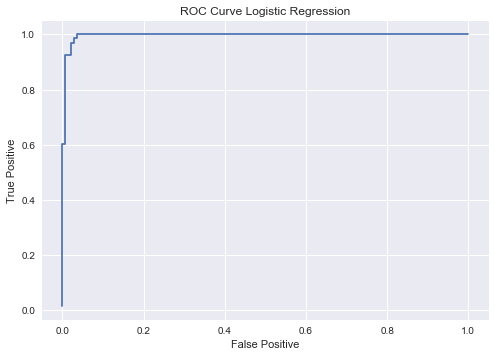

In [26]:
y_pred_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve Logistic Regression')
plt.show()

Finally get the area under the ROC curve to get the idea of predicting the unseen data which is also pretty good in this case.

In [27]:
print 'Area under the ROC curve',roc_auc_score(y_test,y_pred_prob)

Area under the ROC curve 0.995857497929


Similar to logictic regression case we use GridSearchCV to get the best parameter values for KNN and fitted the model using those values on the train data set and computed the score using the test data.

In [28]:
value=np.arange(1,30,1)
knnParam={'n_neighbors':value}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,knnParam,cv=5)
knn_cv.fit(X_train,y_train)
print knn_cv.best_params_

{'n_neighbors': 9}


if we campare the model score of both models they are same so we can say that both models will perform well on the basis of this information.

In [29]:
knnModel=KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knnModel.fit(X_train,y_train)
knn_pred=knnModel.predict(X_test)
print knnModel.score(X_test,y_test)

0.971428571429


Again draw confusion metrix for KNN model to see the performace which is very good but not as Logistic regression.
<br> if we interpreate confusion metrix of both then we can say that in
<br> logistic case: The total number of True Positive and True Negative were 203 in which there were 138 True positive cases and 66 were True negative cases.But there are 2 False positive cases and 4 False Negative cases.
<br> KNN case: The total number of True Positive and True Negative are 204 where and there is only 1 False positive and 5 False Negative.
<br> so both the models done well in this.

In [30]:
print confusion_matrix(y_test,knn_pred)

[[137   5]
 [  1  67]]


On the basis of classification report we can say that on average both the models have same performance for this dataset.

In [31]:
print classification_report(y_test,knn_pred)

             precision    recall  f1-score   support

          0       0.99      0.96      0.98       142
          1       0.93      0.99      0.96        68

avg / total       0.97      0.97      0.97       210



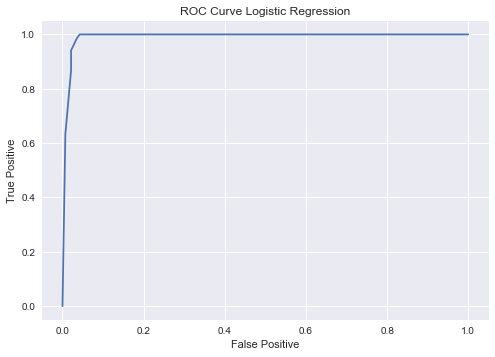

In [32]:
knn_pred_prob=knnModel.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,knn_pred_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve Logistic Regression')
plt.show()

In [33]:
print 'Area Under the ROC curve',roc_auc_score(y_test,knn_pred_prob)

Area Under the ROC curve 0.991093620547


On the basis of above computations we can say that both models are performing well for this data set. We can not say that one is better then other as both are giving the same precision.